<a href="https://colab.research.google.com/github/Alan-Hans/Portafolio-DataScientist/blob/main/Webforecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Web Traffic
This project is about forecasting in a web traffic
You can dowload the data from https://raw.githubusercontent.com/amankharwal/Website-data/master/Thecleverprogrammer.csv
This exersice is an improved version from The clever programmer blog.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import io as BytesIO
import io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving websiteforecasting.csv to websiteforecasting.csv


In [90]:
data = pd.read_csv(io.BytesIO(uploaded["websiteforecasting.csv"]))
data.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [92]:
data['Date'] = pd.to_datetime(data["Date"], format="%d/%m/%Y")
data.set_index(data['Date'], inplace = True, drop = True)


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 391 entries, 2021-06-01 to 2022-06-26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.2 KB


In [95]:
import matplotlib.pyplot as plt

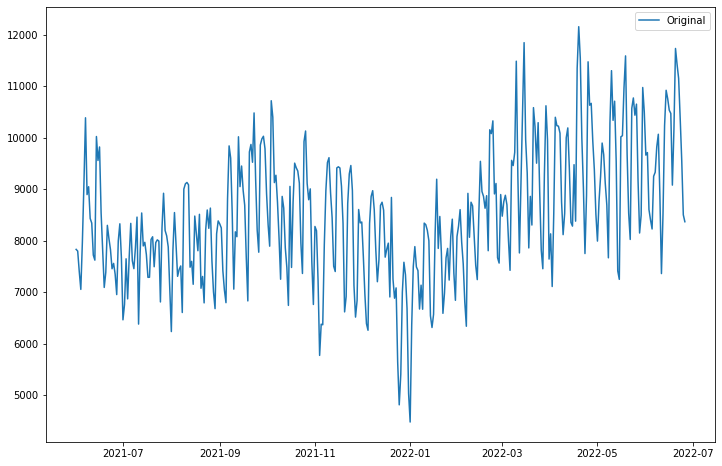

In [97]:
  plt.figure(figsize=(12, 8))
  plt.plot(data['Views'], label='Original')
  plt.legend()

In [152]:
data_settle = data['Views'].resample('D').ffill().dropna() #agrupamiento por mes
data_settle


Date
2021-06-01     7831
2021-06-02     7798
2021-06-03     7401
2021-06-04     7054
2021-06-05     7973
              ...  
2022-06-22    11154
2022-06-23    10382
2022-06-24     9555
2022-06-25     8502
2022-06-26     8368
Freq: D, Name: Views, Length: 391, dtype: int64

In [161]:
data_rolling = data_settle.rolling(30) #ventana dinámica 
data_mean = data_rolling.mean() #media  
data_std = data_rolling.std() # desviación estándar


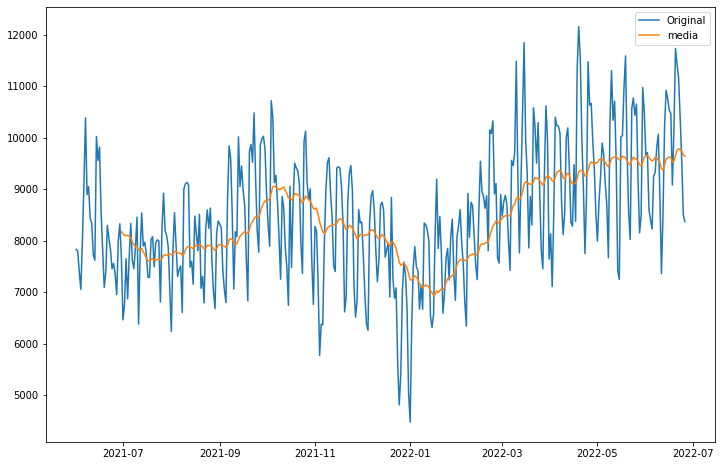

In [162]:
  plt.figure(figsize=(12, 8))
  plt.plot(data_settle, label='Original')
  plt.plot(data_mean, label='media')
  plt.legend()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 432x288 with 0 Axes>

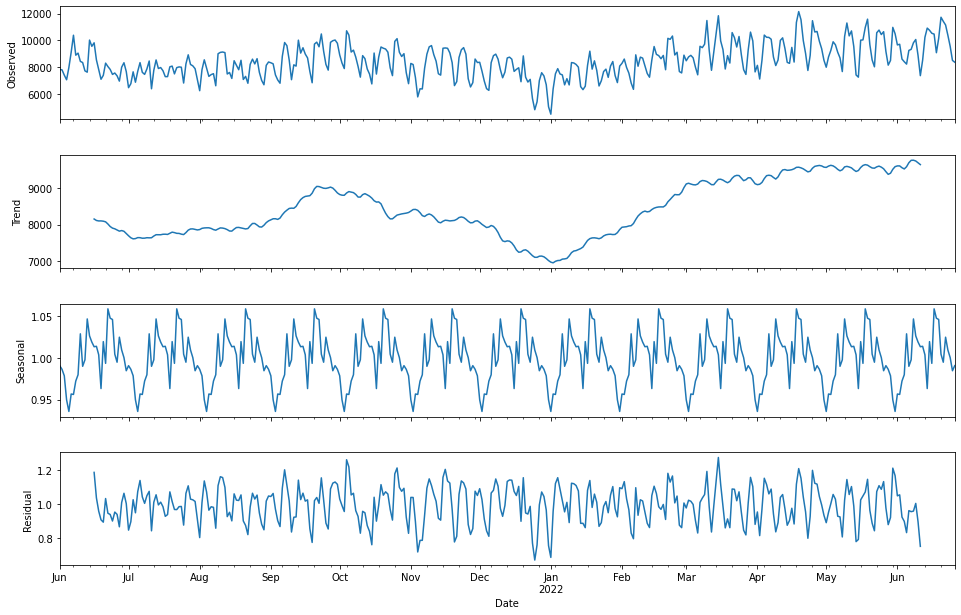

In [163]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data["Views"], 
                            model='multiplicative', 
                            freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

In [165]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.037
Date:                            Sat, 30 Jul 2022   AIC                           6228.074
Time:                                    16:19:57   BIC                           6287.098
Sample:                                06-01-2021   HQIC                          6251.500
                                     - 06-26-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7618      0.130      5.851      0.000       0.507       1.017
ar.L2         -0.7747      0.134   

In [166]:
predictions = model.predict(len(data), len(data)+100)
print(predictions)

2022-06-27     9931.551501
2022-06-28    10807.648332
2022-06-29    10771.689353
2022-06-30     9860.933732
2022-07-01     8779.792839
                  ...     
2022-10-01     9512.758082
2022-10-02     9885.163972
2022-10-03    10793.084285
2022-10-04    11153.464053
2022-10-05    11032.617736
Freq: D, Length: 101, dtype: float64


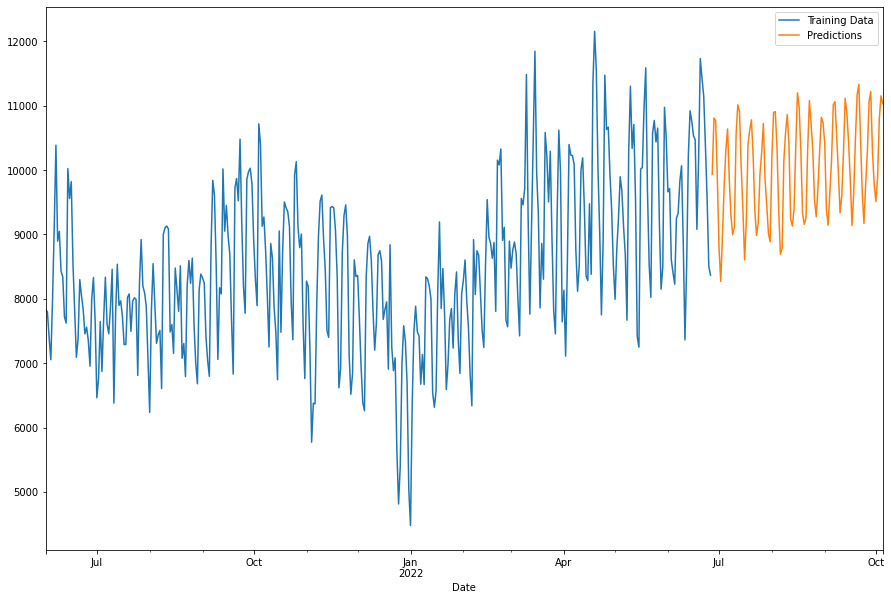

In [167]:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")